In [43]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

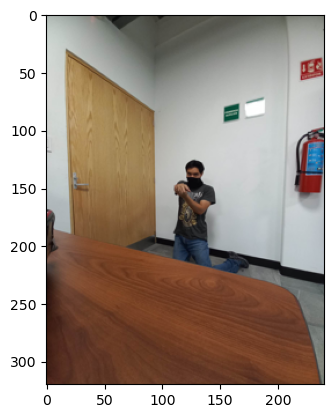

In [44]:
#Se abren las fotos
fondo1 = Image.open("imagenes_combinacion/fondo1.jpg")
fondo2 = Image.open("imagenes_combinacion/fondo2.jpg")
fondo3 = Image.open("imagenes_combinacion/fondo3.jpg")
fondo4 = Image.open("imagenes_combinacion/fondo4.jpg")

yo = Image.open("imagenes_combinacion/yo1.jpg")

#Se cambia el tamaño
ancho = 240
alto = 320

fondo1=fondo1.resize((ancho,alto))
fondo2=fondo2.resize((ancho,alto))
fondo3=fondo3.resize((ancho,alto))
fondo4=fondo4.resize((ancho,alto))

yo=yo.resize((ancho,alto))

plt.imshow(yo)

In [45]:
#Se pasan a rgb
fondo1r, fondo1g, fondo1b = fondo1.split()
fondo2r, fondo2g, fondo2b = fondo2.split()
fondo3r, fondo3g, fondo3b = fondo3.split()
fondo4r, fondo4g, fondo4b = fondo4.split()

yor, yog, yob = yo.split()

#Se sacan arreglos
arr1r = np.asarray(fondo1r)
arr1g = np.asarray(fondo1g)
arr1b = np.asarray(fondo1b)

print(arr1r.shape)

arr2r = np.asarray(fondo2r)
arr2g = np.asarray(fondo2g)
arr2b = np.asarray(fondo2b)

arr3r = np.asarray(fondo3r)
arr3g = np.asarray(fondo3g)
arr3b = np.asarray(fondo3b)

arr4r = np.asarray(fondo4r)
arr4g = np.asarray(fondo4g)
arr4b = np.asarray(fondo4b)

arrar = np.asarray(yor)
arrag = np.asarray(yog)
arrab = np.asarray(yob)

(320, 240)


In [46]:
# se hace el promedio 
promr = np.zeros((alto, ancho), dtype=np.uint8)
promg = np.zeros((alto, ancho), dtype=np.uint8)
promb = np.zeros((alto, ancho), dtype=np.uint8)


for i in range(alto):
    for j in range(ancho):      
        promr[i,j] = (float(arr1r[i][j]) + float(arr2r[i][j]) + float(arr3r[i][j]) + float(arr4r[i][j])) / 4 
        promg[i][j] = (float(arr1g[i][j]) + float(arr2g[i][j]) + float(arr3g[i][j]) + float(arr4g[i][j])) / 4 
        promb[i][j] = (float(arr1b[i][j]) + float(arr2b[i][j]) + float(arr3b[i][j]) + float(arr4b[i][j])) / 4 


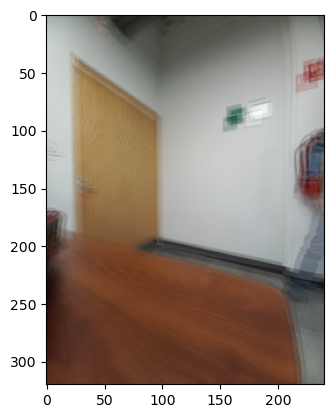

In [47]:
# matriz que contiene la nueva imagen 
img_promedio = np.zeros((alto, ancho, 3), dtype=np.uint8)
        
# Asigna valores a cada canal de color
img_promedio[:,:,0] = promr  # valores de rojo
img_promedio[:,:,1] = promg # valores de verde
img_promedio[:,:,2] = promb  # valores de azul

# Crea una imagen RGB desde la matriz tridimensional
imagen = Image.fromarray(img_promedio)

imagen.save("imagenes_combinacion/promedio.jpg")
plt.imshow(imagen)

In [48]:
# saca el valor absoluto de la diferencia de las imagenes
dr = abs(promr - arrar)
dg = abs(promg - arrag)
db = abs(promb - arrab)

print(promr)
print(arrar)
print(dr)


[[166 166 165 ...  83  82  83]
 [167 167 167 ...  88  88  88]
 [169 169 169 ...  93  92  92]
 ...
 [ 87  87  88 ... 115 114 109]
 [ 87  86  86 ... 114 114 114]
 [ 85  86  87 ... 116 117 117]]
[[173 173 173 ... 114 116 115]
 [175 174 174 ... 119 116 118]
 [177 176 175 ... 123 121 121]
 ...
 [ 76  77  79 ...  80 118 116]
 [ 77  78  82 ...  72 119 122]
 [ 77  80  84 ...  71 114 124]]
[[249 249 248 ... 225 222 224]
 [248 249 249 ... 225 228 226]
 [248 249 250 ... 226 227 227]
 ...
 [ 11  10   9 ...  35 252 249]
 [ 10   8   4 ...  42 251 248]
 [  8   6   3 ...  45   3 249]]


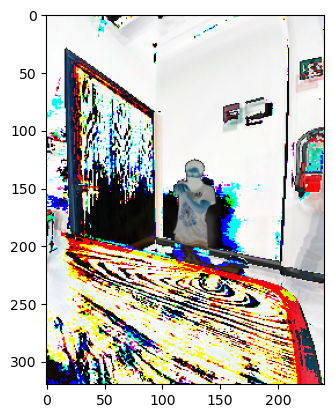

In [49]:
img_d = np.zeros((alto, ancho, 3), dtype=np.uint8)
        
# Asigna valores a cada canal de color
img_d[:,:,0] = dr  # valores de rojo
img_d[:,:,1] = dg # valores de verde
img_d[:,:,2] = db  # valores de azul

# Crea una imagen RGB desde la matriz tridimensional
imagen_d = Image.fromarray(img_d)

imagen.save("imagenes_combinacion/promedio.jpg")
plt.imshow(imagen_d)